## Libralies

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal

sys.path.append('./modules/DataGraph')
from data_graph import DataGraph
sys.path.append('./modules/EvalGraph')
from eval_graph import EvalGraph

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
\begin{split}
\mu_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}, & \quad \Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}, \\
\mu_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}, & \quad \Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}.
\end{split}
\end{equation}


## (1) Plot

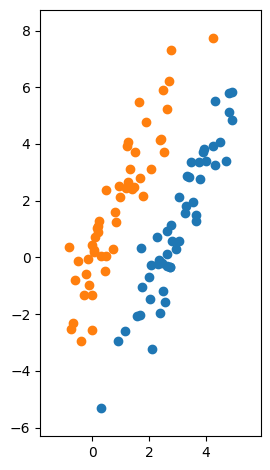

In [2]:
N=100
X = np.vstack( [
                multivariate_normal([3, 1], [[1, 2], [2, 5]], size=N//2),
                multivariate_normal([1, 2], [[1, 2], [2, 5]], size=N//2)
               ])
Y = np.hstack( [np.zeros(N//2), np.ones(N//2)])

dgraph = DataGraph()
dgraph.scatter(X[:N//2, 0], X[:N//2, 1])
dgraph.scatter(X[N//2:, 0], X[N//2:, 1])
dgraph.show()

## (2) PCA

#### Problem

Consider we want to compress $p$ dimensional data ${\bf x}_i \in {\mathbb R}^p$ into $q$ dimentional one ${\bf y}_i \in {\mathbb R}^q$ ($i = 1,2, ..., n$). We use linear transformation by ${\bf W \in {\mathbb R}^{p \times q}}$:

$$
{\bf Y} = {\bf X}{\bf W}
$$

, where ${\bf X} = {[{\bf x}_1, {\bf x}_2, ..., {\bf x}_n]}^T \in {\mathbb R}^{n \times p}$, ${\bf Y} = {[{\bf y}_1, {\bf y}_2, ..., {\bf y}_n]}^T \in {\mathbb R}^{n \times q}$. This means ${\bf y}_i^T = {\bf x}_i^T {\bf W}$, that is, ${\bf y}_i = {\bf W}^T {\bf x}_i$. We want to maximize the scatter of ${\bf Y}$, $\tilde{\sigma}^2$. 

Here, we introduce the average of ${\bf x}, {\bf y}$:

$$
{\bar {\bf x}} = \frac{1}{n} \sum^{n}_{i=1} {\bf x}_i \\
{\bar {\bf y}} = \frac{1}{n} \sum^{n}_{i=1} {\bf y}_i = \frac{1}{n} \sum^{n}_{i=1} {\bf W}^T {\bf x}_i = {\bf W}^T {\bar {\bf x}}
$$

We can represent the scatter $\tilde{\sigma}^2$ by the averages ${\bar {\bf x}}, {\bar {\bf y}}$:

$$
\begin{align}
\tilde{\sigma}^2 &= \frac{1}{n} \sum^{n}_{i=1} {||{\bf y}_i - {\bar {\bf y}}||}^2　\nonumber \\
&= \frac{1}{n} \sum^{n}_{i=1} {({\bf y}_i - {\bar {\bf y}})}^T ({\bf y}_i - {\bar {\bf y}}) \nonumber \\
&= \frac{1}{n} \sum^{n}_{i=1} {({\bf W}^T {\bf x}_i - {\bf W}^T {\bar {\bf x}})}^T ({\bf W}^T {\bf x}_i - {\bf W}^T {\bar {\bf x}}) \nonumber \\
&= \frac{1}{n} \sum^{n}_{i=1} {({\bf W}^T ({\bf x}_i - {\bar {\bf x}}))}^T {({\bf W}^T ({\bf x}_i - {\bar {\bf x}}))} \nonumber \\
&= \frac{1}{n} \sum^{n}_{i=1} {\rm tr}({({\bf W}^T ({\bf x}_i - {\bar {\bf x}}))} {({\bf W}^T ({\bf x}_i - {\bar {\bf x}}))}^T) \nonumber \\
&= \frac{1}{n} \sum^{n}_{i=1} {\rm tr}({({\bf W}^T ({\bf x}_i - {\bar {\bf x}}))} {({({\bf x}_i - {\bar {\bf x}})}^T {\bf W})})\nonumber \\
&= \frac{1}{n} \sum^{n}_{i=1} {\rm tr}({{\bf W}^T ({\bf x}_i - {\bar {\bf x}})} {({\bf x}_i - {\bar {\bf x}})}^T {\bf W})\nonumber \\
&= {\rm tr}({{\bf W}^T (\frac{1}{n} \sum^{n}_{i=1} ({\bf x}_i - {\bar {\bf x}})} {({\bf x}_i - {\bar {\bf x}})}^T) {\bf W})\nonumber \\
&= {\rm tr}({\bf W}^T {\bf \Sigma} {\bf W}) \nonumber
\end{align}
$$

Here we introduce *variance-covariance matrix* ${\bf \Sigma}$:

$$
{\bf \Sigma} = \frac{1}{n} \sum^{n}_{i=1} {({\bf x}_i - {\bar {\bf x}})} {({{\bf x}_i} - {\bar {\bf x}})}^T
$$

We want to find ${\bf W}$ which maxmize $\sigma^2$. We should impose an additional constraint ${\bf W}^T {\bf W} = {\bf I}$ because $\sigma^2$ depends on the scale of ${\bf W}$.

In conclusion, what we have to solve is:

$$
\underset{{\bf W}}{{\rm argmax}} ({\bf W}^T {\bf \Sigma} {\bf W})\quad {\rm subject \hspace{1mm} to}\hspace{1mm}{\bf W}^T {\bf W} = {\bf I}
$$

#### Solusion
Use <span style="color: red; ">**the method of Lagrange multiplier**</span>. We introduce the constraint function $g({\bf W})$:

$$
g({\bf W}) = {\bf W}^T {\bf W} - {\bf I}
$$

and form the Lagragian function ${\mathcal L}$:

$$
\begin{align}
{\mathcal L}({\bf W}, \lambda) &= {\bf W}^T {\bf \Sigma} {\bf W} - \lambda g({\bf W}) \nonumber \\
 &= {\bf W}^T {\bf \Sigma} {\bf W} - \lambda ({\bf W}^T {\bf W} - {\bf I}) \nonumber \\
\end{align}
$$

We find the stationary points of ${\mathcal L}$, which mean all partial derivatives are zero.

$$
\left\{
    \begin{align}
         \frac{\partial {\mathcal L}}{\partial {\bf W}} &= 2{\bf \Sigma W} - 2 \lambda {\bf W} = 0 \nonumber \\
         \frac{\partial {\mathcal L}}{\partial \lambda} &= {\bf W}^T {\bf W} - {\bf I} = 0 \nonumber
    \end{align}
\right.
$$

Thus, the problem reduces to eigenvalue decomposition.

What significance do the eigenvalues have in this problem?　Here, the eigenvector corresponding to the eigenvalue ${\lambda}$ is denoted as ${\bf W}$.

$$
\begin{align}
\tilde{\sigma}^2 &= {\rm tr}({\bf W}^T {\bf \Sigma} {\bf W}) \nonumber \\
 &= {\rm tr}({\bf W}^T \lambda {\bf W}) \nonumber \\
 &= {\rm tr}(\lambda {\bf W}^T {\bf W}) \nonumber \\
 &= q \lambda \quad (\because {\bf W}^T {\bf W} = {\bf I})
\end{align}
$$

So, it suffices to select the eigenvectors corresponding to the $q$ largest eigenvalues in descending order.

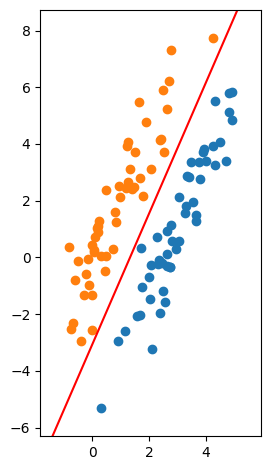

slope : 
	the first principal axis: 2.3045476076142073 (66.54278982804406 [deg])


In [3]:
# Implement by yourself

# step 1: center X
mu = np.mean(X, axis=0)
centered_X = X - mu

# step 2: compute Sigma
Sigma = centered_X.T @ centered_X / N
# or simply, Sigma = np.cov(X, rowvar=0, bias=1)

# step 2: compute eigenvalues and eigenvectors of Sigma
eigen = np.linalg.eig(Sigma)
eigenvalues = eigen[0]
eigenvectors = eigen[1]

# step 3: use the top eigenvector to define the new subspace
W_pca = eigenvectors[0]

dgraph = DataGraph()
dgraph.scatter(X[:N//2, 0], X[:N//2, 1])
dgraph.scatter(X[N//2:, 0], X[N//2:, 1])

slope = W_pca[0] / W_pca[1]
_, _ = dgraph.draw_line(slope, biases=mu, color='red')

dgraph.show()

print('slope : ')
print(f'\tthe first principal axis: {slope} ({np.degrees(np.arctan(slope))} [deg])')

#### Problem
Compute the variance at each axis which has angle $\theta$ given in radians in the range 0 to $\pi$ 

The scatter $\tilde{\sigma}^2$ is given by the following equation:

$$
\tilde{\sigma}^2 = {\rm tr}({\bf W}^T {\bf \Sigma} {\bf W})
$$

${\bf W}$ depends on $\theta$, so we should compute ${\bf W}$ to align the angle. We also take care to consider the constraints: ${\bf W}^T{\bf W} = {\bf I}$

#### Solusion

In this case, ${\bf W \in {\mathbb R}^{2}}$ and ${\bf W}^T{\bf W}$ is a scaler. The constraints can be rephrased as $(w_1)^2 + (w_2)^2 = 1$. Therefore, $w_1, w_2$ can be expressed using trigonometric functions:

$$
w_1 = {\rm cos} \varphi ,\quad w_2 = {\rm sin} \varphi
$$

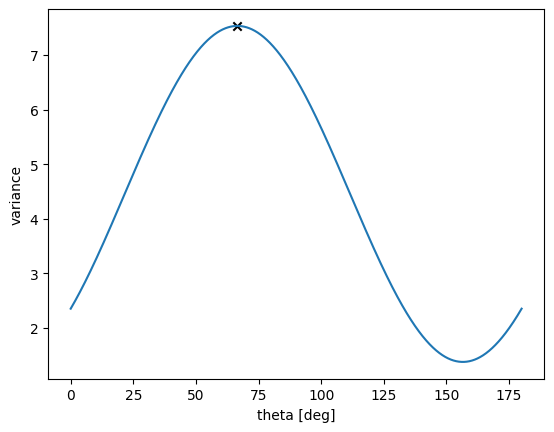

theta = 1.1610470939282875 (66.52309829802014 [deg])
max variance = 7.5333165474501875
slope = 2.3023803674694254


In [4]:
def target(theta_deg, Sigma):
    theta_rad = np.radians(theta_deg)

    w_1 = np.cos(theta_rad)
    w_2 = np.sin(theta_rad)
    W = np.array([w_1, w_2]).T
    sigma_tilde = W.T @ Sigma @ W

    return sigma_tilde

egraph = EvalGraph()
theta_deg, var = egraph.draw_curve(function=target, start=0, stop=180, Sigma=Sigma)
egraph.xlabel('theta [deg]')
egraph.ylabel('variance')

egraph.show()

theta_rad = np.radians(theta_deg)
print(f'theta = {theta_rad} ({theta_deg} [deg])')
print(f'max variance = {var}')
print(f'slope = {(np.tan(theta_rad))}')